# Introdução aos cálculos de propriedades termodinâmicas e de equilíbrio de fases utilizando equações de estado (EoS) e modelos de ${G}^{\mathrm{ E}}$

* Elaborado por Antonio A. R. Patricio
* Disciplina Termodinâmica aplicada
* Trimestre 2016.3

## Mistura binária Água - Etanol

In [1]:
### Componente 1 - Água
### Componente 2 - Etanol
### Componente 3 - Hexano (Para testes)

### Equação de Antoine
### log P = A - B/(C+T)

### Equação de estado de Peng-Robinson (tc-PR)
### P = RT/(V-b) - a*alfa/(V(V+b) + b(V-b))
### a (Tc,Pc) = 0.45724*(RTc)^2/Pc
### alpha (Tr,w) = [1 + (0.37464 + 1.54226*w - 0.26992*w^2)*(1-Tr**0.5)]**2
### b = 0.07780*RTc/Pc

### w é o fator acêntrico
### Tc e Pc são T e P críticos
### Tr é T reduzida (Tr = T/Tc)

## Parte 1 - Uso da equação de estado para cálculos com componentes puros

### 1) Equilíbrio Líquido-Vapor

### a) Cálculo da pressão de saturação (${P}^{\mathrm{ sat}}$) dos dois componentes puros da mistura escolhida

#### a.1) Cálculo de ${P}^{\mathrm{ sat}}$ pela Equação de Antoine

In [2]:
# Define T

T = 373 # Unidade K

# DDBST - http://ddbonline.ddbst.com/AntoineCalculation/AntoineCalculationCGI.exe
def P_antoine(T,comp):
    
    A=0
    B=0
    C=0
    
    if comp == 1: # Água
        if T<(1+273.15):
            return 0
    
        elif T<(100+273.15):
            A = 8.07131
            B = 1730.63
            C = 233.426
            
        elif T<(374+273.15):
            A = 8.14019
            B = 1810.94
            C = 244.485
        
        else:
            return 0
       
    elif comp == 2: #Etanol
        if T<(-57+273.15):
            return 0
    
        elif T<=(80+273.15):
            A = 8.20417
            B = 1642.89
            C = 230.3
            
        elif T<=(243+273.15):
            A = 7.68117
            B = 1332.04
            C = 199.2
        
        elif T == 5.1635e2:
            return 6.3e6
        
        else:
            return 0
    
    elif comp ==3: #Hexano
        
        if T < (-95+273.15):
            return 0 #no correlation available
        
        elif T <= (235+273.15):
            A=7.01051
            B=1246.33
            C=232.988
               
        else:
            return 0
       
    return 10**(A - B/(C+T-273.15))*101325/760 # T em Kelvin e P convertido para Pascal

* Pressão de saturação dos Componentes 1, 2 e 3

In [3]:
# Print de Psat dos componentes 1, 2 e 3
# Unidade Pa

print ("")
print("Psat Antoine Componente 1 =  ",P_antoine(T,1),"Pa")
print ("")
print("Psat Antoine Componente 2 =  ",P_antoine(T,2),"Pa")
print ("")
print("Psat Antoine Componente 3 =  ",P_antoine(T,3),"Pa")


Psat Antoine Componente 1 =   100792.88156885628 Pa

Psat Antoine Componente 2 =   224819.8213981028 Pa

Psat Antoine Componente 3 =   245956.67440069505 Pa


#### a.2) Cálculo de ${P}^{\mathrm{ sat}}$ pela Equação de Estado (PR)

In [4]:
R = 8.3144598 #Pa.m3.mol^−1.K^−1 (Constante universal)

# Propriedades do Componente 1 - Água

Tc1 = 647.0         # unidade K
Pc1 = 22.064e6      # unidade Pa
w1 = 3.449e-1       # fator acêntrico

# Propriedades do Componente 2 - Etanol

Tc2 = 5.1635e2      # unidade K
Pc2 = 6.3e6         # unidade Pa
w2 = 6.37e-1        # fator acêntrico

# Propriedades do Componente 3 - Hexano (para Testes)

Tc3 = 507.5        # unidade K
Pc3 = 3010000      # unidade Pa
w3 = 0.301         # fator acêntrico

# Cálculo das Temperaturas Reduzidas

Tr1 = T/Tc1
Tr2 = T/Tc2
Tr3 = T/Tc3

#print(Tr1, Tr2)

# Cálculo do parâmetro b

b1 = 0.07780*(R*Tc1/Pc1)
b2 = 0.07780*(R*Tc2/Pc2)
b3 = 0.07780*(R*Tc3/Pc3)

#print(b1,b2,b3)

# Cálculo do parâmetro a (Só depende das propriedades críticas dos componentes)

a1 = 0.45724*(R*Tc1)**2/Pc1
a2 = 0.45724*(R*Tc2)**2/Pc2
a3 = 0.45724*(R*Tc3)**2/Pc3

print (a1,a2,a3)

0.5997035287555941 1.3377042444532796 2.70469245411083


#### Função básica 1 - EoS em representação ${P}({T},{V})$

In [5]:
# Definição da função alpha (Tr, w) para tc-PR

def function_alpha (T,Tc,w):
    return (1+(0.37464+1.54226*w-0.26992*(w**2))*(1-(T/Tc)**0.5))**2

In [6]:
# Definição da função básica 1

# T em unidade K
# V em unidade m3
# Componente (1, 2 ou 3 a depender do componente desejado)

def function_P (T,V,Componente):
    
    if Componente == 1:
        a     = a1
        b     = b1
        alpha = function_alpha (T,Tc1,w1)
        w     = w1
        
    elif Componente == 2:
        a     = a2
        b     = b2
        alpha = function_alpha (T,Tc2,w2)
        w     = w2
    
    elif Componente == 3:
        a     = a3
        b     = b3
        alpha = function_alpha (T,Tc3,w3)
        w     = w3
    
    return R*T/(V-b)-(a*alpha)/(V*(V+b)+b*(V-b))

print("Água   -- P =",function_P(100,0.0224,1),"Pa")
print("Etanol -- P =",function_P(100,0.0224,2),"Pa")
print("Hexano -- P =",function_P(100,0.0224,3),"Pa")

Água   -- P = 34354.01206284823 Pa
Etanol -- P = 29550.941871179788 Pa
Hexano -- P = 26030.59161072287 Pa


#### Função básica 2 - Cálculo dos volumes que zeram a função Resíduo (RES)

* Calcular $\bar{V}$ que resolve ${P}{\bar{V}^3}−({P}{b}-{R}{T}){\bar{V}^2}+({a.  \alpha_{(Tr,w)}}-3{P}{b}^2-2{b}{R}{T})\bar{V}−({P}{b}^3-{a.  \alpha_{(Tr,w)}{b}}+{R}{T}{b}^2)={0}$


* Considerando a EoS de Peng-Robinson (tc-PR): 

   $P=\frac{RT}{\bar{V}-b}-\frac{a.  \alpha_{(Tr,w)}}{{\bar{V}}({\bar{V}+b})+{{{b}}({\bar{V}-b})}}$  
   

* Rearranjando a equação para ${\bar{V}}$ para utilização do método de Newton-Raphson, obtêm-se:

   ${Res}={c_3}\bar{V}^3+{c_2}\bar{V}^2+{c_1}\bar{V}+{c_0}$
   

* Derivando-se a função Resíduo, obtêm-se:

   $\frac{\partial {Res}}{\partial {V}}=3{c_3}\bar{V}^2+2{c_2}\bar{V}+{c_1}$
   

* Estimativa inicial: gás ideal:


   $\bar{V}_1^{[0]} = \frac{{R}{T}}{P}$


* Mais duas raízes: Método de redução de ordem de polinômio:


   ${c_3}\bar{V}^3+{c_2}\bar{V}^2+{c_1}\bar{V}+c_0=(\bar{V}-\bar{V}_1)({c_4}\bar{V}^2+{c_5}\bar{V}+{c_6})$
   
 ...............................................$={c_4}\bar{V}^3+({c_5}-{c_4}\bar{V}_1)\bar{V}^2+({c_6}-{c_5}\bar{V}_1)\bar{V}+  (-{c_6}\bar{V}_1)$
   ${c_4} = {c_3}$
   ${c_5} = {c_2}+{c_4}\bar{V}_1$
   ${c_6} = {c_1}+{c_5}\bar{V}_1$

* Soluçãos das raizes de uma parábola:

   $\bar{V}_2 = \frac{-{c_5}+\sqrt{{c_5}^2-4{c_4}{c_6}}}{2{c_4}}$   e   $\bar{V}_3 = \frac{-{c_5}-\sqrt{{c_5}^2-4{c_4}{c_6}}}{2{c_4}}$

In [7]:
import numpy as np

In [8]:
def function_V(T,P,Componente):

# T em unidade K
# P em unidade Pa
# Componente (1, 2 ou 3 a depender do componente desejado)
    
    if Componente == 1:
        a     = a1
        b     = b1
        alpha = function_alpha(T,Tc1,w1)
        w     = w1
    
    elif Componente == 2:
        a     = a2
        b     = b2
        alpha = function_alpha(T,Tc2,w2)
        w     = w2
    
    elif Componente == 3:
        a     = a3
        b     = b3
        alpha = function_alpha(T,Tc3,w3)
        w     = w3
    
    c3 = P                                # Coeficiente para V^3 para EoS PR
    c2 = P*b - R*T                        # Coeficiente para V^2 para EoS PR
    c1 = a*alpha - 3*P*(b**2) - 2*b*R*T   # Coeficiente para V^1 para EoS PR
    c0 = P*b**3 - a*alpha*b + R*T*(b**2)  # Termo independente para EoS PR
    
    RES=1                           # Resíduo
    TOL=1e-12                       # Tolerância
    MAX=2000                        # Número máximo de iterações
    i=0                             # Contador de iterações
    
    V=R*T/P                         # Estimativa de volume inicial (Gás Ideal)
    V2=0                            # Volume 2 inicial
    V3=0                            # Volume 3 inicial
    
    while(RES>TOL and i<MAX): #Kernel > Interrupt (console > Ctrl+C)
        V=V-(c3*V**3+c2*V**2+c1*V+c0)/(3*c3*V**2+2*c2*V+c1)
        RES=c3*V**3+c2*V**2+c1*V+c0
        i=i+1
    
# Cálculo dos outros Volumes 2 (V2) e 3 (V3) pelo método de redução de ordem de polinômio
    
    c4=c3
    c5=c2+c4*V
    c6=c1+c5*V
    
    delta=(c5**2)-(4*c4*c6)

    if delta >= 0:
        V2=(-c5 + np.sqrt(delta))/(2*c4)
        V3=(-c5 - np.sqrt(delta))/(2*c4)
    elif delta/(c5*c5) >= -0.1:
        V2=V3=( -c5 )/(2*c4) #< se delta "pouco negativo" em relação a c5, vamos supor delta igual a zero
    else:
        V2=0
        V3=0
        
# Filtro de V dentro do intervalo (b,infinito)

    if V<b:
        V=0
    if V2<b:
        V2=0
    if V3<b:
        V3=0

    [V,V2,V3]=np.sort([V,V2,V3])
    
    return [V,V2,V3]

tryT=220     # Kelvin
tryP=100000  # Unidade Pa

[ansv1,ansv2,ansv3]=function_V(tryT,tryP,1)
[ansv4,ansv5,ansv6]=function_V(tryT,tryP,2)
[ansv7,ansv8,ansv9]=function_V(tryT,tryP,3)

print("Água")
print(ansv1,"m3","---",function_P(tryT,ansv1,1),"Pa")
print(ansv2,"m3","---",function_P(tryT,ansv2,1),"Pa")
print(ansv3,"m3","---",function_P(tryT,ansv3,1),"Pa")

print("")
print("Etanol")
print(ansv4,"m3,","---",function_P(tryT,ansv4,2),"Pa")
print(ansv5,"m3","---",function_P(tryT,ansv5,2),"Pa")
print(ansv6,"m3,","---",function_P(tryT,ansv6,2),"Pa")

print("")
print("Hexano")
print(ansv7,"m3,","---",function_P(tryT,ansv7,3),"Pa")
print(ansv8,"m3","---",function_P(tryT,ansv8,3),"Pa")
print(ansv9,"m3,","---",function_P(tryT,ansv9,3),"Pa")

Água
2.0317942186e-05 m3 --- 100000.001272 Pa
0.000571251839705 m3 --- 100000.0 Pa
0.0176812732485 m3 --- 100000.0 Pa

Etanol
5.73882638931e-05 m3, --- 99995.9503664 Pa
0.00146481243725 m3 --- 99999.9999642 Pa
0.0167165936004 m3, --- 100000.0 Pa

Hexano
0.000121146578463 m3, --- 99999.9999065 Pa
0.00242926887973 m3 --- 100000.0 Pa
0.0156323316588 m3, --- 100000.0 Pa


#### Função básica 3 - Energia Livre de Gibbs Residual (${G}^{\mathrm{ R}}$)

In [9]:
# A Energia Livre de Gibbs residual para a EoS de Peng-Robinson é dado por
# G_residual / RT = Z - 1 - ln (Z - P*b/RT) - a/(2*((2)**1/2)*b*RT)*ln((V+(1+2**1/2)*b)/V+(1-2**1/2)*b)
# Fonte: Chemical Engineering Thermodynamics Pág. 333 - Autor: Pradeep Ahuja | Ano 2008

def G_Residual(T,P,V,Componente):
    
    if Componente == 1:
        a     = a1
        b     = b1
        alpha = function_alpha(T,Tc1,w1)
        w     = w1
        
    elif Componente == 2:
        a     = a2
        b     = b2
        alpha = function_alpha(T,Tc2,w2)
        w     = w2
        
    elif Componente == 3:
        a     = a3
        b     = b3
        alpha = function_alpha(T,Tc3,w3)
        w     = w3
    
# Cálculo de G_Residual pelo Pradeep Ahuja

#    part1 = P*V/(R*T)
#    part2 = np.log(P*V/(R*T)-P*b/(R*T))
#    part3 = a/(2*np.sqrt(2)*b*R*T)
#    part4 = np.log((V+(1+np.sqrt(2))*b)/(V+(1-np.sqrt(2))*b))
    
#    return R*T*(part1-1-part2-part3*part4)

# Cálculo pela equação generalizada do Smith, Van Ness e Abbott (Pág 163 - Ed. 2008)

    Sigma   = 1 + 2**0.5  # (Para EoS PR)
    Epsilon = 1 - 2**0.5  # (Para EoS PR) 
    Z       = P*V/(R*T)
    Beta    = b*P/(R*T)
    q       = a*alpha/(b*R*T)
    I       = np.log((Z+Sigma*Beta)/(Z+Epsilon*Beta))*1/(2*np.sqrt(2))
    
    return R*T*(Z - 1 - np.log(Z - Beta)- q*I)

T=373
P=1e5

Vs1=function_V(T,P,1)
print("Componente 1")
print("")
print(function_V(T,P,1))
print(G_Residual(T,P,Vs1[0],1))
print(G_Residual(T,P,Vs1[1],1))
print(G_Residual(T,P,Vs1[2],1))
print("")
print("Componente 2")
print("")
Vs2=function_V(T,P,2)
print(function_V(T,P,2))
print(G_Residual(T,P,Vs2[0],2))
print(G_Residual(T,P,Vs2[1],2))
print(G_Residual(T,P,Vs2[2],2))
print("")
print("Componente 3")
print("")
Vs3=function_V(T,P,3)
print(function_V(T,P,3))
print(G_Residual(T,P,Vs3[0],3))
print(G_Residual(T,P,Vs3[1],3))
print(G_Residual(T,P,Vs3[2],3))


Componente 1

[2.2496380741480576e-05, 0.00022484203859176525, 0.030746628105063387]
-159.279428756
8854.97743599
-26.5338842626

Componente 2

[6.7754926874268054e-05, 0.00044219555155247664, 0.030449967317078112]
2370.45091172
6683.85198957
-55.8914367514

Componente 3

[0.00014788137167289441, 0.00074470954424343577, 0.030011279695055997]
2486.81713423
5038.71918395
-98.9360110828


#### Cálculo da ${P}^{\mathrm{ sat}}$ pela imposição do equilíbrio entre as fases ( ${f}^{\mathrm{ L}}({T},{P}) = {f}^{\mathrm { V}}({T},{P})$ )

In [10]:
def P_sat(T,iguess_P,comp):

    RES=1       # Resíduo Inicial
    TOL=1e-9    # Tolerância
    MAX=1000    # Iterações
    i=0         # Contador de iterações
    P=iguess_P  # Chute inicial de P
    
    while(RES>TOL and i<MAX): #Kernel > Interrupt (console > Ctrl+C)
#        [V_L,_,V_V]=function_V(T,P,comp)

        ans_V=function_V(T,P,comp)
    
        if (len(ans_V) == 1): # Caso só haja uma raiz
            return #return sem variável

        [V_L,_,V_V] = ans_V
        phi_L=np.exp(G_Residual(T,P,V_L,comp)/(R*T))
        phi_V=np.exp(G_Residual(T,P,V_V,comp)/(R*T))
        P=P*(phi_L/phi_V)
        RES=np.abs(phi_L/phi_V-1.)
        i=i+1
        
#        print(" P           |       V_L       |      V_V      |    phi_L    |     phi_V    |  phi_L/phi_V-1 | Iteração  ")
#        print(P,V_L,V_V,phi_L,phi_V,phi_L/phi_V-1," ", i-1)
#        print ("")

    print(T,P,V_L,V_V) #<-- note a origem dos problemas é o v
    #temos nas 3 ultimas T os seguintes resultaqdos:
    
    #510.363131313 nan 0.0 0.000402717829757 <<<<<<<<<<<<<<<<< VL deu 0
    #513.356565657 nan 0.0 nan <<<<<<<<<<<<<<<<< VL deu 0
    #516.35 nan 0.0 nan <<<<<<<<<<<<<<<<< VL deu 0
    return P

tryT = 373
tryP = 1e5

print ("")
print("Água")
print ("")
Psat=P_sat(tryT,tryP,1)
print("Psat Comp 1=      ",Psat,"Pa")
print ("")
Psat=P_sat(tryT+50,tryP,1)
print("Psat Comp 1=      ",Psat,"Pa")
print ("")
Psat=P_sat(tryT+100,tryP,1)
print("Psat Comp 1=      ",Psat,"Pa")
print ("")
Psat=P_sat(tryT+150,tryP,1)
print("Psat Comp 1=      ",Psat,"Pa")

print ("")
print ("")

print("Etanol")
print ("")
Psat=P_sat(tryT,tryP,2)
print("Psat Comp 2=      ",Psat,"Pa")
print ("")
Psat=P_sat(tryT+50,tryP,2)
print("Psat Comp 2=      ",Psat,"Pa")
print ("")
Psat=P_sat(tryT+100,tryP,2)
print("Psat Comp 2=      ",Psat,"Pa")
print ("")
Psat=P_sat(tryT+150,tryP,2)
print("Psat Comp 2=      ",Psat,"Pa")
print ("")

print ("")
print ("")

print("Hexano")
print ("")
Psat=P_sat(tryT,tryP,3)
print("Psat Comp 3=      ",Psat,"Pa")
print ("")
Psat=P_sat(tryT+50,tryP,3)
print("Psat Comp 3=      ",Psat,"Pa")
print ("")
Psat=P_sat(tryT+75,tryP,3)
print("Psat Comp 3=      ",Psat,"Pa")
print ("")
Psat=P_sat(tryT+100,tryP,3)
print("Psat Comp 3=      ",Psat,"Pa")
print ("")


Água

373 95772.2769698 2.24964047222e-05 0.032115730119
Psat Comp 1=       95772.2769698 Pa

423 467217.245821 2.37054423338e-05 0.00730907619396
Psat Comp 1=       467217.245821 Pa

473 1556188.46049 2.54058235714e-05 0.00234221932129
Psat Comp 1=       1556188.46049 Pa

523 4017460.34025 2.79852886027e-05 0.00092066770161
Psat Comp 1=       4017460.34025 Pa


Etanol

373 224309.866832 6.77405111695e-05 0.0132522072872
Psat Comp 2=       224309.866832 Pa

423 958489.681069 7.60941764708e-05 0.00320347647978
Psat Comp 2=       958489.681069 Pa

473 2892481.37628 9.43688747385e-05 0.000954109581087
Psat Comp 2=       2892481.37628 Pa

523 nan 0.0 0.0432342861897
Psat Comp 2=       nan Pa



Hexano

373 242939.102772 0.000147750585721 0.0117239622368
Psat Comp 3=       242939.102772 Pa

423 747457.985865 0.000168969499633 0.0038138214899
Psat Comp 3=       747457.985865 Pa

448 1189298.78809 0.000186899978041 0.00228753893554
Psat Comp 3=       1189298.78809 Pa

473 1803480.57055 0.000

/home/segtovichisv/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in log
/home/segtovichisv/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:43: RuntimeWarning: invalid value encountered in log


#### Valores obtidos pela EoS para o Componente 1 (Água)

In [11]:
#grid feito usando a função linspace, gera pontos igualmente espaçados em escala linear
grid_T1 = np.linspace(220,Tc1,100)
grid_P1 = np.zeros(100)

# Estimativa inicial para o primeiro cálculo
guess_P1 = 100

#efetua primeiro calculo
grid_P1[0] = P_sat(grid_T1[0],guess_P1,1) #primeiro ponto

#efetua demais cálculos
for i in range(1,100): #demais pontos
    grid_P1[i] = P_sat(grid_T1[i],grid_P1[i-1],1)
#    print(grid_T1[i],grid_P1[i])

220.0 2.83086469845 2.03685140957e-05 646.167450934
224.313131313 4.76459537016 2.02776050891e-05 391.72036891
228.626262626 7.8260733794 2.03965662362e-05 242.894432011
232.939393939 12.6137211269 2.04367845802e-05 153.546862242
237.252525253 19.9398592703 2.04892656253e-05 98.9283456375
241.565656566 30.9507468234 2.05367913204e-05 64.8925190862
245.878787879 47.2191895318 2.05831697103e-05 43.2943790741
250.191919192 70.8710366464 2.06306468136e-05 29.3515647443
254.505050505 104.736646266 2.06789148266e-05 20.2032610427
258.818181818 152.531367232 2.07281231145e-05 14.1076689749
263.131313131 219.067371152 2.07783644622e-05 9.98640164554
267.444444444 310.498878631 2.08296009964e-05 7.16111367847
271.757575758 434.602355568 2.088184429e-05 5.19861058307
276.070707071 601.092667457 2.09351811508e-05 3.81825226531
280.383838384 821.975512938 2.09896182513e-05 2.83572803609
284.696969697 1111.93573567 2.10451875705e-05 2.1284058613
289.01010101 1488.76035379 2.11019204435e-05 1.613673

#### Valores obtidos pela EoS para o Componente 2 (Etanol)

In [12]:
#grid feito usando a função linspace, gera pontos igualmente espaçados em escala linear.
grid_T2 = np.linspace(220,Tc2,100)
grid_P2 = np.zeros(100)

#estimativa inicial para o primeiro cálculo
guess_P2 = 100

#efetua primeiro calculo
grid_P2[0] = P_sat(grid_T2[0],guess_P2,2) #primeiro ponto

#efetua demais cálculos
for i in range(1,100): #demais pontos
    grid_P2[i] = P_sat(grid_T2[i],grid_P2[i-1],2)
    #print(grid_T2[i],grid_P2[i]) #<- note Nan nos 3 ultimos valores de Psat que não convergiram proximo ao Tc/Pc

220.0 9.71432027772 5.73896854586e-05 188.29594094
222.993434343 13.9457384844 5.74993422929e-05 132.947436191
225.986868687 19.7969091971 5.76121253141e-05 94.9103346956
228.98030303 27.802418661 5.77267514144e-05 68.4764089026
231.973737374 38.644597348 5.78441449146e-05 49.9082693276
234.967171717 53.1860360357 5.79636081954e-05 36.7306172181
237.960606061 72.5072181522 5.80851430196e-05 27.2858566679
240.954040404 97.9496659938 5.82093573259e-05 20.452142583
243.947474747 131.164953463 5.8335973829e-05 15.4624479438
246.940909091 174.169889016 5.84651394231e-05 11.787180191
249.934343434 229.408110311 5.85969066344e-05 9.05722170951
252.927777778 299.818258815 5.87313978179e-05 7.01295989405
255.921212121 388.908821425 5.88686579221e-05 5.47019933937
258.914646465 500.839637044 5.90087588955e-05 4.29714932712
261.908080808 640.509971729 5.91517969472e-05 3.39874685132
264.901515152 813.652968306 5.92978412197e-05 2.70588318668
267.894949495 1026.93617781 5.94469842464e-05 2.1679375

#### Valores obtidos pela EoS para o Componente 3 (Hexano)

In [13]:
#grid feito usando a função linspace, gera pontos igualmente espaçados em escala linear.
grid_T3 = np.linspace(170,Tc3,100)
grid_P3 = np.zeros(100)

#estimativa inicial para o primeiro cálculo
guess_P3 = 100

#efetua primeiro calculo
grid_P3[0] = P_sat(grid_T3[0],guess_P3,3) #primeiro ponto

#efetua demais cálculos
for i in range(1,100): #demais pontos
    grid_P3[i] = P_sat(grid_T3[i],grid_P3[i-1],3)
#    print(grid_T3[i],grid_P3[i])

170.0 0.522508044419 0.000116417124796 2709.88980804
173.409090909 0.871709511433 0.000117083981937 1653.86720916
176.818181818 1.42567779146 0.000117512965268 1031.17471269
180.227272727 2.28438736252 0.000117729918085 655.96816162
183.636363636 3.5899542654 0.000117997847989 425.305250748
187.045454545 5.53930761601 0.000118267878522 280.750924045
190.454545455 8.40066854754 0.000118541270456 188.497229436
193.863636364 12.5336180133 0.00011882104145 128.601065285
197.272727273 18.4130852819 0.000119106124375 89.0761272074
200.681818182 26.6575838453 0.000119396874651 62.5897133739
204.090909091 38.0619765966 0.00011969296814 44.5801230891
207.5 53.6349802596 0.000119995233513 32.1640004792
210.909090909 74.6415360567 0.000120303442392 23.49110127
214.318181818 102.650078716 0.000120617917707 17.3569641348
217.727272727 139.584633737 0.000120938828637 12.966739759
221.136363636 187.781565929 0.000121266328839 9.7890304408
224.545454545 250.050694852 0.000121600610914 7.46414454901
22

### b) e c) Comparação entre os valores obtidos pela EoS, pela equação de Antoine e com dados experimentais

#### b.1) Água

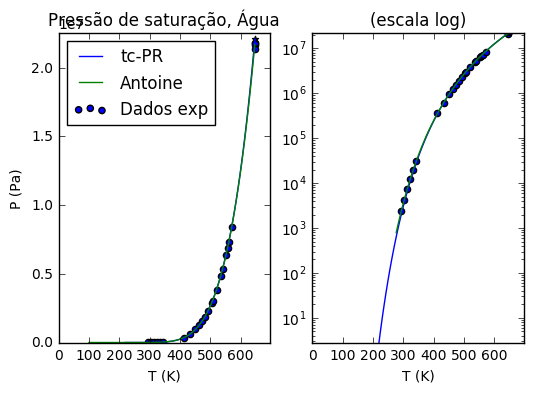

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#ativar uma figura 1
plt.figure(1)

#legend=[] #iniciador do objeto legenda

plt.subplot(121) #activate a subplot
plt.title('Pressão de saturação, Água')

#o grafico P x T calculado

#filtrar not-a-number e zeros
grid_P1_real     = ~np.isnan(grid_P1)
filtered_grid_T1 = grid_T1[ np.where( grid_P1_real ) ]
filtered_grid_P1 = grid_P1[ np.where( grid_P1_real ) ]

#traçar

plt.plot(filtered_grid_T1,filtered_grid_P1, label='tc-PR') #label é a etiqueta que será usada na legenda

## ddbst

grid_TAntoine1 = np.linspace(100,Tc1,100)
grid_PAntoine1 = np.array([ P_antoine(grid_TAntoine1[i],1) for i in range(100) ])

# traçar

plt.plot(grid_TAntoine1,grid_PAntoine1, label='Antoine')

#dados experimentais
table = np.loadtxt('water vapor pressure.txt', dtype='float', comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
T_exp_1 = table[:,0]
P_exp_1 = table[:,1]*1000

plt.scatter(T_exp_1,P_exp_1, label='Dados exp')
plt.scatter(Tc1,Pc1,marker="*")

# opções adicionais do gráfico

## limites no eixo x e y
plt.xlabel('T (K)')
plt.ylabel('P (Pa)')
plt.xlim([0,Tc1+50])
plt.ylim([0,Pc1+500000])

plt.legend(loc=2) #exibe legenda na localização "0", ver no gráfico:

#ativar uma segunda figura
plt.figure(1)
plt.subplot(122) #activate a subplot

plt.title('(escala log)')


# mesmos plots em escala log
plt.semilogy(filtered_grid_T1,filtered_grid_P1)
plt.semilogy(grid_TAntoine1,grid_PAntoine1)
plt.scatter(T_exp_1,P_exp_1)
plt.scatter(Tc1,Pc1,marker="*")
plt.xlabel('T (K)')
plt.xlim([0,Tc1+50])
plt.ylim([0,Pc1+500000])

plt.show()

#### b.2) Etanol

[ 292.772  296.783  298.872  301.307  306.484  309.756  312.387  316.378
  320.499  324.231  327.814  332.023  336.015  339.728  343.709  348.13
  350.555  351.139  351.49   351.647  352.338  355.512  358.986  362.756
  366.631]


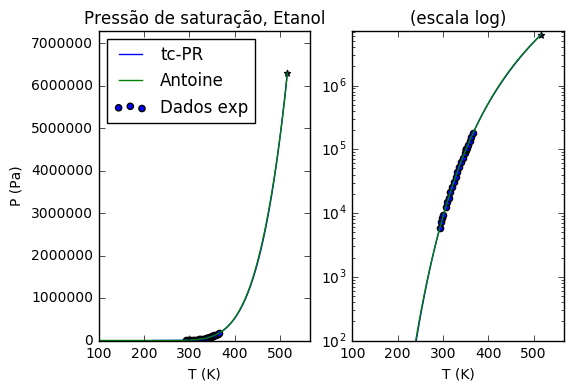

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

#ativar uma figura 2
plt.figure(2)

#legend=[] #iniciador do objeto legenda

plt.subplot(121) #activate a subplot
plt.title('Pressão de saturação, Etanol')

#o grafico P x T calculado

#filtrar not-a-number e zeros
grid_P2_real     = ~np.isnan(grid_P2)
filtered_grid_T2 = grid_T2[ np.where( grid_P2_real ) ]
filtered_grid_P2 = grid_P2[ np.where( grid_P2_real ) ]

#traçar

plt.plot(filtered_grid_T2,filtered_grid_P2, label='tc-PR') #label é a etiqueta que será usada na legenda

## ddbst

grid_TAntoine2 = np.linspace(100,Tc2,100)
grid_PAntoine2 = np.array([ P_antoine(grid_TAntoine2[i],2) for i in range(100) ])

#print(grid_TAntoine2,grid_PAntoine2)

# traçar

plt.plot(grid_TAntoine2,grid_PAntoine2, label='Antoine')

# Dados experimentais - Etanol
table2 = np.loadtxt('Dados de Psat - etanol.txt', dtype='float', comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
#T_exp_2 = table[:,0] #<---------------------------------aqui é table2, você estava plotando os dadosexp da água
#P_exp_2 = table[:,1]*1000  #<---------------------------------aqui é table2, você estava plotando os dadosexp da água
T_exp_2 = table2[:,0] #<---------------------------------aqui é table2, você estava plotando os dadosexp da água
P_exp_2 = table2[:,1] #<---------------------------------aqui é table2, você estava plotando os dadosexp da água
print(T_exp_2)

plt.scatter(T_exp_2,P_exp_2, label='Dados exp')
plt.scatter(Tc2,Pc2,marker="*")

# opções adicionais do gráfico

## limites no eixo x e y
plt.xlabel('T (K)')
plt.ylabel('P (Pa)')
plt.xlim([100,Tc2+50])
plt.ylim([0,Pc2+1000000])

plt.legend(loc=2) #exibe legenda na localização "0", ver no gráfico:

#ativar uma segunda figura
plt.figure(2)
plt.subplot(122) #activate a subplot

plt.title('(escala log)')

# mesmos plots em escala log
plt.semilogy(filtered_grid_T2,filtered_grid_P2)
plt.semilogy(grid_TAntoine2,grid_PAntoine2)
plt.scatter(T_exp_2,P_exp_2)
plt.scatter(Tc2,Pc2,marker="*")
plt.xlabel('T (K)')
plt.xlim([100,Tc2+50])
plt.ylim([100,Pc2+1000000])

plt.show()

#### b.3) Hexano

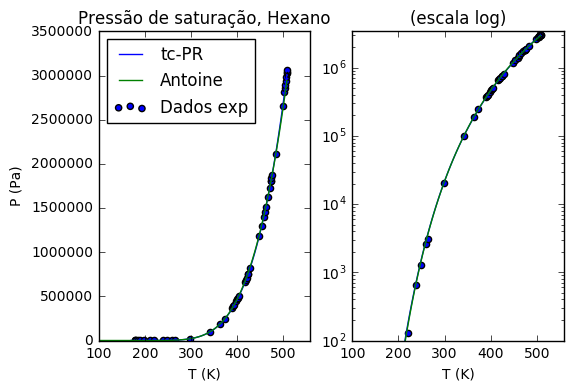

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Ativar figura 3
plt.figure(3)

#legend=[] #iniciador do objeto legenda

plt.subplot(121) #activate a subplot
plt.title('Pressão de saturação, Hexano')

#o grafico P x T calculado

#filtrar not-a-number e zeros
grid_P3_real = ~np.isnan(grid_P3)
filtered_grid_T3 = grid_T3[ np.where( grid_P3_real ) ]
filtered_grid_P3 = grid_P3[ np.where( grid_P3_real ) ]

#traçar

plt.plot(filtered_grid_T3,filtered_grid_P3, label='tc-PR') #label é a etiqueta que será usada na legenda

# Dados experimentais - Hexano
table3 = np.loadtxt('Dados de Psat - hexano.txt', dtype='float', comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
#T_exp_3 = table[:,0] #< table 3
#P_exp_3 = table[:,1]*1000 #< table 3
T_exp_3 = table3[:,0] #< table 3
P_exp_3 = table3[:,1] #< table 3

plt.scatter(T_exp_3,P_exp_3, label='Dados exp')
plt.scatter(Tc3,Pc3,marker="*")

## ddbst

grid_TAntoine3 = np.linspace(100,Tc3,100)
grid_PAntoine3 = np.array([ P_antoine(grid_TAntoine3[i],3) for i in range(100) ])

# traçar

plt.plot(grid_TAntoine3,grid_PAntoine3, label='Antoine')

# opções adicionais do gráfico

## limites no eixo x e y
plt.xlabel('T (K)')
plt.ylabel('P (Pa)')
plt.xlim([100,Tc3+50])
plt.ylim([0,Pc3+500000])

plt.legend(loc=2) #exibe legenda na localização "0", ver no gráfico:

#ativar uma segunda figura
plt.figure(3)
plt.subplot(122) #activate a subplot

plt.title('(escala log)')

# mesmos plots em escala log
plt.semilogy(filtered_grid_T3,filtered_grid_P3)
plt.semilogy(grid_TAntoine3,grid_PAntoine3)
plt.scatter(T_exp_3,P_exp_3)
plt.scatter(Tc3,Pc3,marker="*")
plt.xlabel('T (K)')
plt.xlim([100,Tc3+50])
plt.ylim([100,Pc3+500000])

plt.show()

### 2) Propriedades Termodinâmicas de Substâncias Puras

In [17]:
# Definição da função da/dT

def da_dT(T,Componente):

    if Componente == 1:
        a     = a1
        b     = b1
        alpha = function_alpha(T,Tc1,w1)
        w     = w1
        Tc    = Tc1
        
    elif Componente == 2:
        a     = a2
        b     = b2
        alpha = function_alpha(T,Tc2,w2)
        w     = w2
        Tc    = Tc2
        
    elif Componente == 3:
        a     = a3
        b     = b3
        alpha = function_alpha(T,Tc3,w3)
        w     = w3
        Tc    = Tc3
    
    return -a*(0.37464+1.54226*w-0.26992*w**2)/((alpha*T*Tc)**0.5)

In [18]:
# Definição das funções residuais H e S

def H_Residual(T,P,V,Componente):
    
    if Componente == 1:
        a     = a1
        b     = b1
        alpha = function_alpha(T,Tc1,w1)
        dadT  = da_dT(T,Componente)
        w     = w1
        
    elif Componente == 2:
        a     = a2
        b     = b2
        alpha = function_alpha(T,Tc2,w2)
        dadT  = da_dT(T,Componente)
        w     = w2
        
    elif Componente == 3:
        a     = a3
        b     = b3
        alpha = function_alpha(T,Tc3,w3)
        dadT  = da_dT(T,Componente)
        w     = w3
    
    Z       = P*V/(R*T)
    Sigma   = 1 + 2**0.5  # (Para EoS PR)
    Epsilon = 1 - 2**0.5  # (Para EoS PR) 
    Beta    = b*P/(R*T)
    q       = 1/(b*R*T)
    I       = np.log((Z+Sigma*Beta)/(Z+Epsilon*Beta))*1/(2*np.sqrt(2))
    
    return R*T*(Z - 1 + (T*dadT-a)*q*I)

In [19]:
def S_Residual(T,P,V,Componente):
    
    if Componente == 1:
        a     = a1
        b     = b1
        alpha = function_alpha(T,Tc1,w1)
        dadT  = da_dT(T,Componente)
        w     = w1
        
    elif Componente == 2:
        a     = a2
        b     = b2
        alpha = function_alpha(T,Tc2,w2)
        dadT  = da_dT(T,Componente)
        w     = w2
        
    elif Componente == 3:
        a     = a3
        b     = b3
        alpha = function_alpha(T,Tc3,w3)
        dadT  = da_dT(T,Componente)
        w     = w3
    
    Z       = P*V/(R*T)
    Sigma   = 1 + 2**0.5  # (Para EoS PR)
    Epsilon = 1 - 2**0.5  # (Para EoS PR) 
    Beta    = b*P/(R*T)
    q       = 1/(b*R*T)
    I       = np.log((Z+Sigma*Beta)/(Z+Epsilon*Beta))*1/(2*np.sqrt(2))
    
    return R*(np.log(Z - Beta) -(dadT*q*I))

In [20]:
# Teste para Água

tryT = 373.15
tryP = 1e5

Psat=P_sat(tryT,tryP,1)
print("")
print("Psat  = ",Psat,"Pa")
print("")

Vsat=function_V(tryT,Psat,1)
print(Vsat)
print("")

print("V_liq          =",Vsat[0],"m3/mol","    ||",Vsat[0]*1e3/18,"cm3/g") #<------ mudei de m3 para m3/mol
print("H_residual_liq =",H_Residual(tryT,Psat,Vsat[0],1),"J/mol","    ||",H_Residual(tryT,Psat,Vsat[0],1)/18,"kJ/kg")
print("S_residual_liq =",S_Residual(tryT,Psat,Vsat[0],1),"J/mol.K","  ||",S_Residual(tryT,Psat,Vsat[0],1)/18,"kJ/kg.K")
print("G_residual_liq =",G_Residual(tryT,Psat,Vsat[0],1),"J/mol","    ||",G_Residual(tryT,Psat,Vsat[0],1)/18,"kJ/kg")
print("")
print("V_vap          =",Vsat[2],"m3/mol","      ||",Vsat[2]*1e3/18,"cm3/g") #<------ mudei de m3 para m3/mol
print("H_residual_vap =",H_Residual(tryT,Psat,Vsat[2],1),"J/mol","    ||",H_Residual(tryT,Psat,Vsat[2],1)/18,"kJ/kg")
print("S_residual_vap =",S_Residual(tryT,Psat,Vsat[2],1),"J/mol.K","||",S_Residual(tryT,Psat,Vsat[2],1)/18,"kJ/kg.K")
print("G_residual_vap =",G_Residual(tryT,Psat,Vsat[2],1),"J/mol","    ||",G_Residual(tryT,Psat,Vsat[2],1)/18,"kJ/kg")
print("")
delta_H_residual = np.abs(H_Residual(tryT,Psat,Vsat[2],1)-H_Residual(tryT,Psat,Vsat[0],1))
delta_S_residual = np.abs(S_Residual(tryT,Psat,Vsat[2],1)-S_Residual(tryT,Psat,Vsat[0],1))
delta_G_residual = np.abs(G_Residual(tryT,Psat,Vsat[2],1)-G_Residual(tryT,Psat,Vsat[0],1))
print("delta_H_residual =",delta_H_residual,"J/mol")
print("delta_S_residual =",delta_S_residual,"J/mol.K")
print("delta_G_residual =",delta_G_residual,"J/mol")

373.15 96300.9091627 2.24995085905e-05 0.0319510935878

Psat  =  96300.9091627 Pa

[2.2499508591635789e-05, 0.00022458669155000913, 0.031951093595707317]

V_liq          = 2.24995085916e-05 m3/mol     || 0.00124997269954 cm3/g
H_residual_liq = -29757.0648326 J/mol     || -1653.17026848 kJ/kg
S_residual_liq = -75.7490644873 J/mol.K   || -4.2082813604 kJ/kg.K
G_residual_liq = -25.5317728254 J/mol     || -1.41843182363 kJ/kg

V_vap          = 0.0319510935957 m3/mol       || 1.77506075532 cm3/g
H_residual_vap = -54.6717191744 J/mol     || -3.03731773191 kJ/kg
S_residual_vap = -0.0738109436274 J/mol.K || -0.0041006079793 kJ/kg.K
G_residual_vap = -25.5317728186 J/mol     || -1.41843182325 kJ/kg

delta_H_residual = 29702.3931134 J/mol
delta_S_residual = 75.6752535436 J/mol.K
delta_G_residual = 6.80207179471e-09 J/mol


In [21]:
# Gráfico

H_axis_liq = np.zeros(100)
H_axis_vap = np.zeros(100)
S_axis_liq = np.zeros(100)
S_axis_vap = np.zeros(100)

for i in range (0,100):
    Vs = function_V(grid_T1[i],grid_P1[i],1)
    H_axis_liq[i] = H_Residual(grid_T1[i],grid_P1[i],Vs[0],1)/18
    H_axis_vap[i] = H_Residual(grid_T1[i],grid_P1[i],Vs[2],1)/18 
    S_axis_liq[i] = S_Residual(grid_T1[i],grid_P1[i],Vs[0],1)/18
    S_axis_vap[i] = S_Residual(grid_T1[i],grid_P1[i],Vs[2],1)/18
    
#    print(Vs)
    print(grid_P1[i],H_axis_liq[i],H_axis_vap[i],S_axis_liq[i],S_axis_vap[i])
    #<--- vejo apenas 3 NaN aqui, proximo ao ponto critico, isso é um resultado bom dentro da metodologia q estamos usando
    #< note q a P deu Nan primeiro, então se quisermos ter H e S ok precisamos apenas consertar o calculo de Psat nessa regiao de dificuldades

2.83086469845 -1530.08105157 -0.000163853032862 -9.25549620575 -4.35995380114e-07
4.76459537016 -1531.87030505 -0.000269654448847 -8.98997767381 -7.0073292906e-07
7.8260733794 -1535.10392501 -0.000433262673748 -8.74624492772 -1.09995357975e-06
12.6137211269 -1539.67066086 -0.000683360099726 -8.51975422373 -1.69552921706e-06
19.9398592703 -1544.19103548 -0.00105753500826 -8.30235829145 -2.56526119425e-06
30.9507468234 -1548.70154002 -0.00160757652312 -8.09371684564 -3.81357914571e-06
47.2191895318 -1553.33458184 -0.00240272004078 -7.89403037947 -5.57604718638e-06
70.8710366464 -1557.76243844 -0.00353418106734 -7.70114315229 -8.02614869915e-06
104.736646266 -1562.16915489 -0.00512036095513 -7.51561323118 -1.13826256117e-05
152.531367232 -1566.49346512 -0.00731282344517 -7.33675923764 -1.59174824332e-05
219.067371152 -1570.75382238 -0.010303044911 -7.16432598586 -2.19645398183e-05
310.498878631 -1574.94661074 -0.0143299272259 -6.99797245795 -2.99284089011e-05
434.602355568 -1579.06820321 

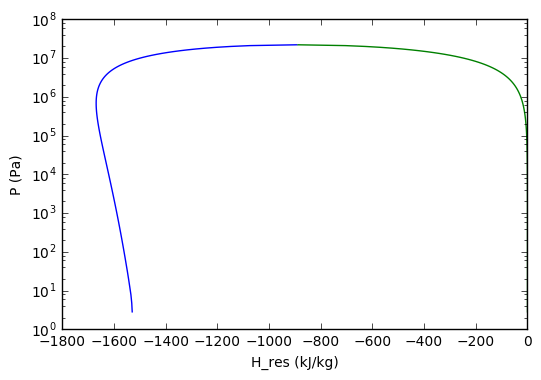

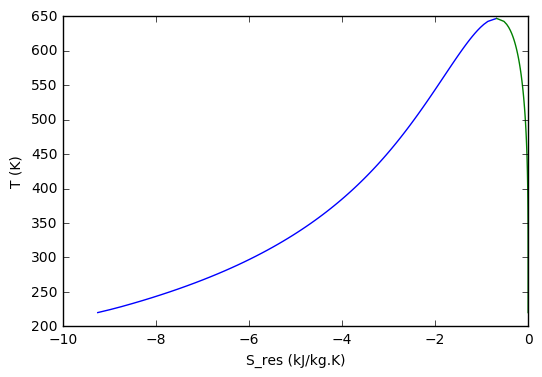

In [22]:
plt.figure(1)
plt.semilogy(H_axis_liq,grid_P1)
plt.semilogy(H_axis_vap,grid_P1)
plt.xlabel('H_res (kJ/kg)')
plt.ylabel('P (Pa)')

plt.figure(2)
plt.plot(S_axis_liq,grid_T1)
plt.plot(S_axis_vap,grid_T1)
plt.xlabel('S_res (kJ/kg.K)')
plt.ylabel('T (K)')

plt.show()